<a href="https://colab.research.google.com/github/zuhairnasir/Project_2/blob/main/ev_charging_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

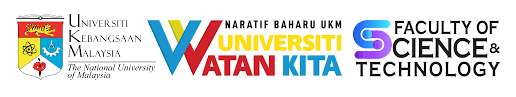
# **Project 2**
>
### **STQD6014 Data Science Semester 1 2024/2024**
>
*Muhammad Zuhair Afham Bin Mohd Nasir (P153944)*


### **Title:** *Analysis of Electric Vehicle Charging Patterns for Sustainable Transportation*

>
>
# **Content Outline**
1. [**Introduction**](#intro)
    * [Purpose](#purpose): Overview of the project
    * [Dataset](#dataset): Dataset used
    * [Objective](#objective): Objective of the analysis


2. [**Problem Statement**](#problem)


3. [**Results and Discussion**](#result)
    * [Analysis of Charging Duration](#charging-duration): Distribution and insights
    * [Charger Type Utilization](#charger-type): Popularity and usage patterns
    * [Charging Station Demand by Location](#location-demand): Identifying high demand areas
    * [Cost Variation Across Charger Types](#cost-variation): Relationship between cost and charger type
    * [Cost and Energy Consumption](#cost-energy): Correlation and optimization
    * [Correlation Analysis](#correlation): Visualizing relationships between variables


4. [**Conclusion**](#summary)

5. [**References**](#reference)

# **1. Introduction** <a name='intro'></a>


## **Purpose** <a name='purpose'></a>

**Electric vehicles (EVs)** are at the forefront of sustainable transportation and green energy. The purpose of this project is to analyze electric vehicle (EV) charging patterns to understand user behavior, charging station utilization and temporal trends. This analysis aims to identify patterns and trends that can inform the development of efficient and user-friendly EV charging infrastructure by leveraging data on charging durations, station types, and locations. The findings will help improve charging station placement, improve operational efficiency, and support the growing adoption of electric vehicles as part of a sustainable transportation ecosystem for a greener future.
>
>
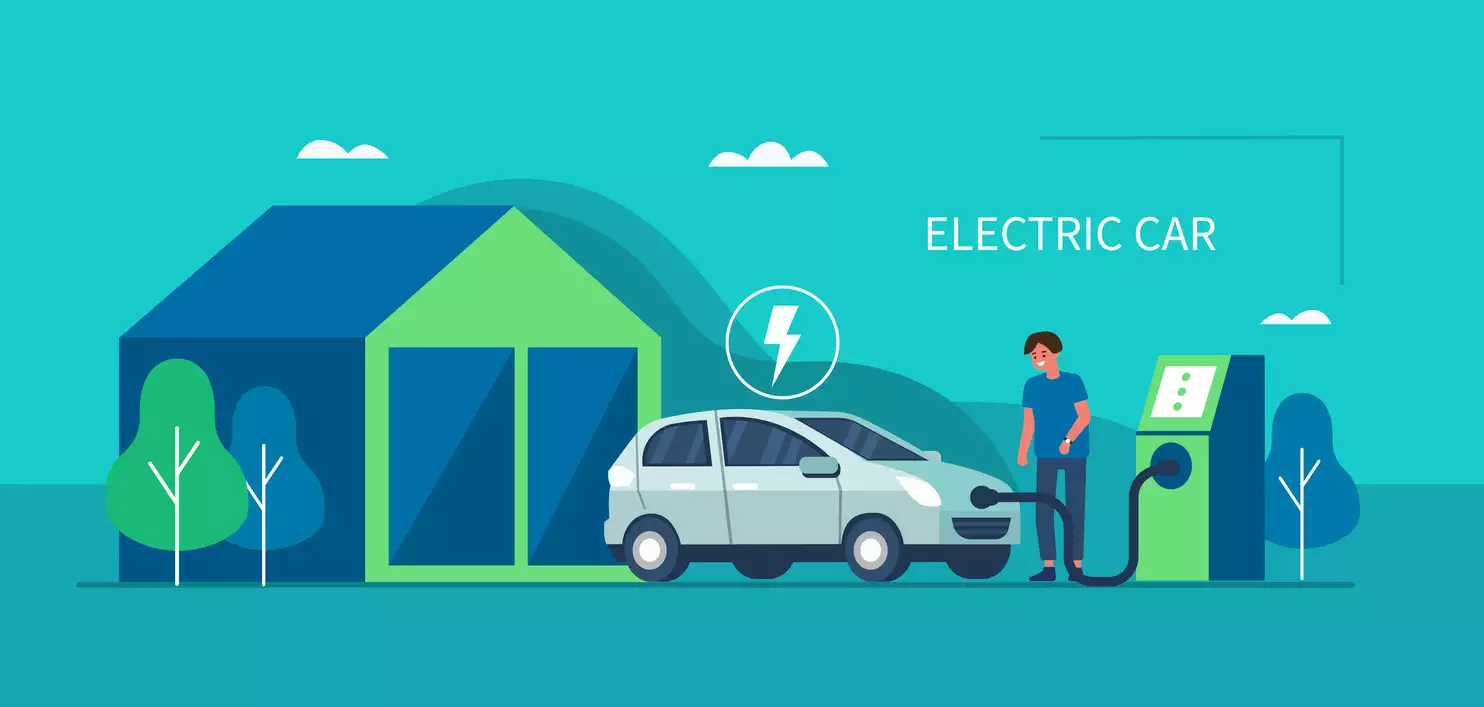

## **Dataset** <a name='dataset'></a>
This analysis uses a dataset from [Kaggle](https://www.kaggle.com/datasets/valakhorasani/electric-vehicle-charging-patterns/data) that provides detailed information about EV charging patterns. It includes details such as:
- Types of charging station.
- Charging session durations.
- Locations of charging station.
- Daily and seasonal trends in EV charging usage.

## **Objective** <a name='objective'></a>
The primary objectives of this analysis are:
* To identify charging behavior patterns.
* To determine the most frequently used charger types.
* To optimize the best charging station locations.
* To analyze correlations between charging costs and charging type.
* To explore the relationship between cost and energy consumption.
* To support the development of a sustainable EV charging infrastructure to meet the growing demand for electric vehicles.

---

# **2. Problem Statements** <a name='problem'></a>
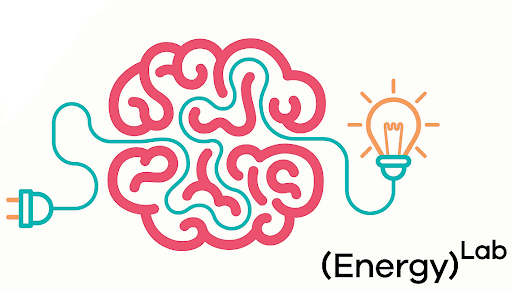
1. What are the key patterns in EV charging behavior?
2. Which types of charging stations are most frequntly used?
3. How can the data be used to determine the best locations for charging stations.
4. What is the distribution of charging costs, and how does it vary by charger type?
5. What is the relationship between charging cost and energy consumed at charging stations?
6. How can these insights support the growing adoption of electric vehicles and contribute to the development of a sustainable transportation ecosystem?

### Import library and load the dataset

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# load ev dataset
data_ev = pd.read_csv('/content/drive/MyDrive/Data_Science/Project_2/ev_charging_patterns.csv')

In [4]:
# display the first 5 rows of the dataset
data_ev.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,01/01/2024 0:00,01/01/2024 0:39,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,01/01/2024 1:00,01/01/2024 3:01,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,01/01/2024 2:00,01/01/2024 4:48,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,01/01/2024 3:00,01/01/2024 6:42,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,01/01/2024 4:00,01/01/2024 5:46,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


### Data Cleaning

In [5]:
# check missing values
print(data_ev.isnull().sum())

User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64


In [6]:
# remove unnecessary columns
columns_to_drop=['User ID','Vehicle Model', 'Charging Start Time', 'Charging End Time', 'Distance Driven (since last charge) (km)','Temperature (°C)', 'Vehicle Age (years)', 'User Type']
data_ev.drop(columns=[col for col in columns_to_drop if col in data_ev.columns], inplace=True)
print(data_ev.columns)

Index(['Battery Capacity (kWh)', 'Charging Station ID',
       'Charging Station Location', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'Day of Week',
       'State of Charge (Start %)', 'State of Charge (End %)', 'Charger Type'],
      dtype='object')


In [7]:
# calculate null values for Energy Consumed (kWh)
data_ev['Energy Consumed (kWh)'] = data_ev['Energy Consumed (kWh)'].fillna(
    data_ev['Battery Capacity (kWh)'] * (data_ev['State of Charge (End %)'] - data_ev['State of Charge (Start %)']) / 100)

In [8]:
# calculate null values for Charging Rate (kW)
data_ev['Charging Rate (kW)'] = data_ev['Charging Rate (kW)'].fillna(
    data_ev['Energy Consumed (kWh)'] / data_ev['Charging Duration (hours)'])

In [9]:
# check missing values again
print(data_ev.isnull().sum())

Battery Capacity (kWh)       0
Charging Station ID          0
Charging Station Location    0
Energy Consumed (kWh)        0
Charging Duration (hours)    0
Charging Rate (kW)           0
Charging Cost (USD)          0
Time of Day                  0
Day of Week                  0
State of Charge (Start %)    0
State of Charge (End %)      0
Charger Type                 0
dtype: int64


In [10]:
# convert data types for date
if 'date' in data_ev.columns:
    data_ev['date'] = pd.to_datetime(data_ev['date'], errors='coerce')

In [11]:
# check data type
data_ev.dtypes

,0
Battery Capacity (kWh),float64
Charging Station ID,object
Charging Station Location,object
Energy Consumed (kWh),float64
Charging Duration (hours),float64
Charging Rate (kW),float64
Charging Cost (USD),float64
Time of Day,object
Day of Week,object
State of Charge (Start %),float64


In [12]:
# remove invalid values such negative or zero
data_ev = data_ev.loc[(data_ev['Charging Duration (hours)'] > 0)]

if 'sessions' in data_ev.columns:
    data = data_ev[data_ev['sessions'] > 0]

In [13]:
# create new columns to extract day, month, and year from the 'date' column
data_ev['day'] = pd.to_datetime(data_ev.get('date', pd.Series(dtype='datetime64[ns]')), errors='coerce').dt.day
data_ev['month'] = pd.to_datetime(data_ev.get('date', pd.Series(dtype='datetime64[ns]')), errors='coerce').dt.month
data_ev['year'] = pd.to_datetime(data_ev.get('date', pd.Series(dtype='datetime64[ns]')), errors='coerce').dt.year

In [14]:
# show data info
print(data_ev.info())
print(data_ev.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1320 entries, 0 to 1319
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Battery Capacity (kWh)     1320 non-null   float64
 1   Charging Station ID        1320 non-null   object 
 2   Charging Station Location  1320 non-null   object 
 3   Energy Consumed (kWh)      1320 non-null   float64
 4   Charging Duration (hours)  1320 non-null   float64
 5   Charging Rate (kW)         1320 non-null   float64
 6   Charging Cost (USD)        1320 non-null   float64
 7   Time of Day                1320 non-null   object 
 8   Day of Week                1320 non-null   object 
 9   State of Charge (Start %)  1320 non-null   float64
 10  State of Charge (End %)    1320 non-null   float64
 11  Charger Type               1320 non-null   object 
 12  day                        0 non-null      float64
 13  month                      0 non-null      float64
 1

# **3. Results and Discussion** <a name='result'></a>

### **Analysis of Charging Duration** <a name='charging-duration'></a>

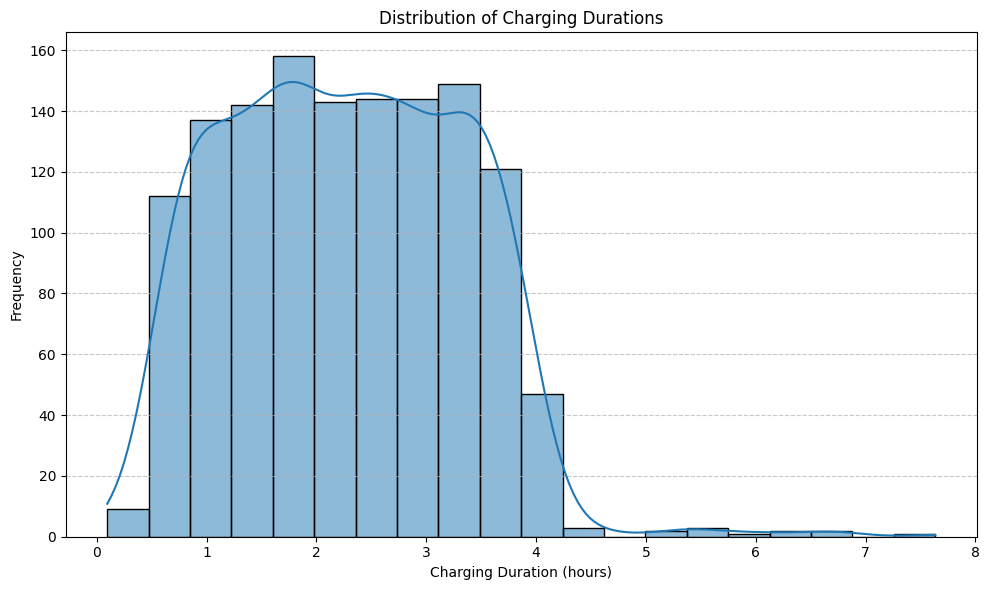

In [15]:
# 1. create plot for key patterns in EV Charging Behavior
plt.figure(figsize=(10, 6))
sns.histplot(data_ev['Charging Duration (hours)'], bins=20, kde=True)
plt.title('Distribution of Charging Durations')
plt.xlabel('Charging Duration (hours)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:** The histogram of charging durations shows that most charging sessions last between 1 and 4 hours with a peak around 3 hours. This pattern indicates a preference for medium duration charging that likely influenced by users charging their vehicles during errands or work hours. The longer tail represents occasional extended charging sessions that likely by users fully recharging their batteries.
>
**Explanation:** This insight can guide infrastructure planning by highlighting the need for chargers designed to handle medium duration sessions efficiently. Additionally, locations catering to quick stops would benefit from the installation of more fast chargers to meet user demands effectively.

----

### **Charger Type Utilization** <a name='charger-type'></a>


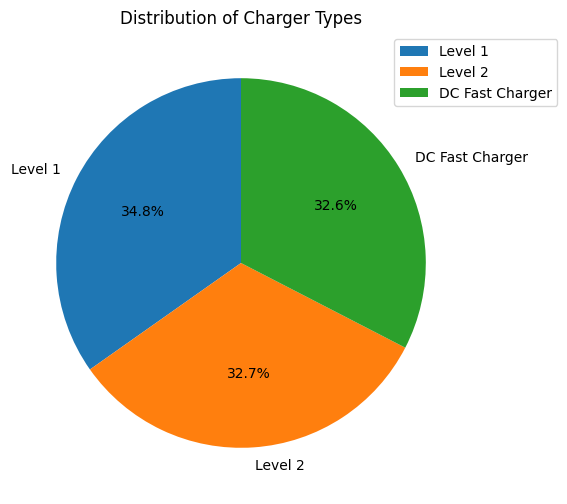

In [16]:
# 2. create pie chart for types of charging stations most frquently used
station_types = data_ev['Charger Type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(station_types, labels=station_types.index, autopct='%1.1f%%', startangle=90,
        textprops={'fontsize': 10})
plt.legend(station_types.index, loc="upper right",bbox_to_anchor=(1.2, 1), fontsize=10)
plt.title('Distribution of Charger Types')
plt.show()


**Insight:** The pie chart indicates that Level 1 chargers are the most used with 34.8% of the total sessions, closely followed by Level 2 and DC Fast Chargers at 32.7% and 32.6% respectively. The nearly even distribution suggests varied user preferences based on charging speed and availability.
>
**Explanation:** This insight highlights the need for maintaining a balance in charger types to accommodate diverse user needs. Expanding DC Fast Chargers in urban areas and along highways can address growing demands for rapid charging while Level 1 and Level 2 chargers are suited for residential and workplace settings.

----

### **Charging Station Demand by Location** <a name='location-demand'></a>

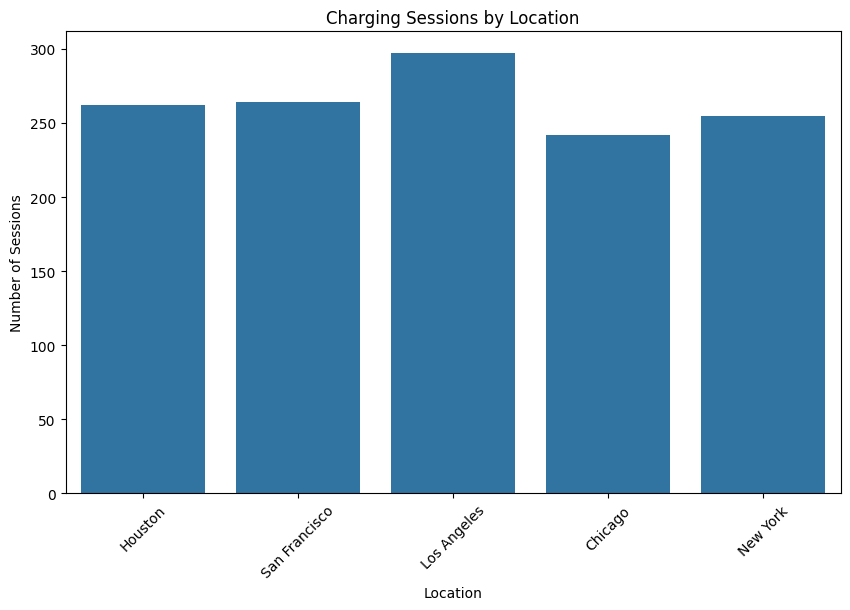

In [17]:
# 3. create bar plot for charging sessions by location
plt.figure(figsize=(10, 6))
sns.countplot(x='Charging Station Location', data=data_ev)
plt.title('Charging Sessions by Location')
plt.xlabel('Location')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.show()

**Insight:** The bar plot reveals that Los Angeles have the highest number of sessions and followed closely by New York, San Francisco, and other cities. This shows that urban areas and population hubs experience greater charging demand.
>
**Explanation:**
Hotspot locations, such as Los Angeles require further investment in charging infrastructure to meet demand. Lesser utilized locations could be analyzed for accessibility improvements or relocation opportunities.

----

### **Cost Variation Across Charger Types** <a name='cost-variation'></a>

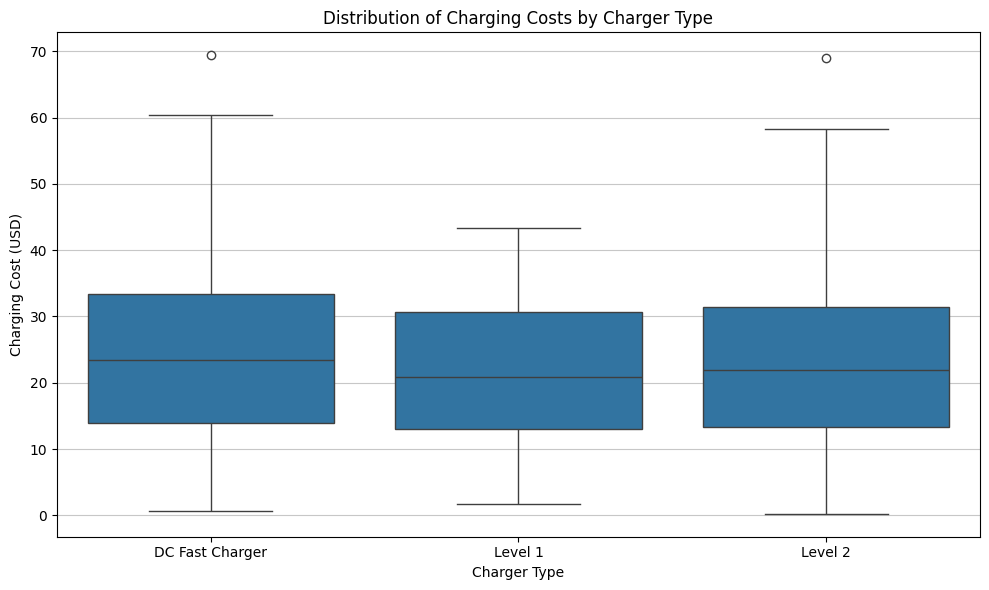

In [18]:
# 4. create box plot for the charging costs by charger type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Charger Type', y='Charging Cost (USD)', data=data_ev)
plt.title('Distribution of Charging Costs by Charger Type')
plt.xlabel('Charger Type')
plt.ylabel('Charging Cost (USD)')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:** The box plot shows that DC Fast Chargers have higher median costs compared to Level 1 and Level 2 chargers. There is significant variation in charging costs across all types with outliers for both high and low costs.
>
**Explanation:** The higher costs for DC Fast Chargers align with their speed and convenience. Level 1 and Level 2 chargers are more cost-effective for users who prioritize affordability over speed. Pricing strategies could focus on aligning cost with value without compromising operational efficiency.

----

### **Charging Cost and Energy Consumed** <a name='cost-energy'></a>

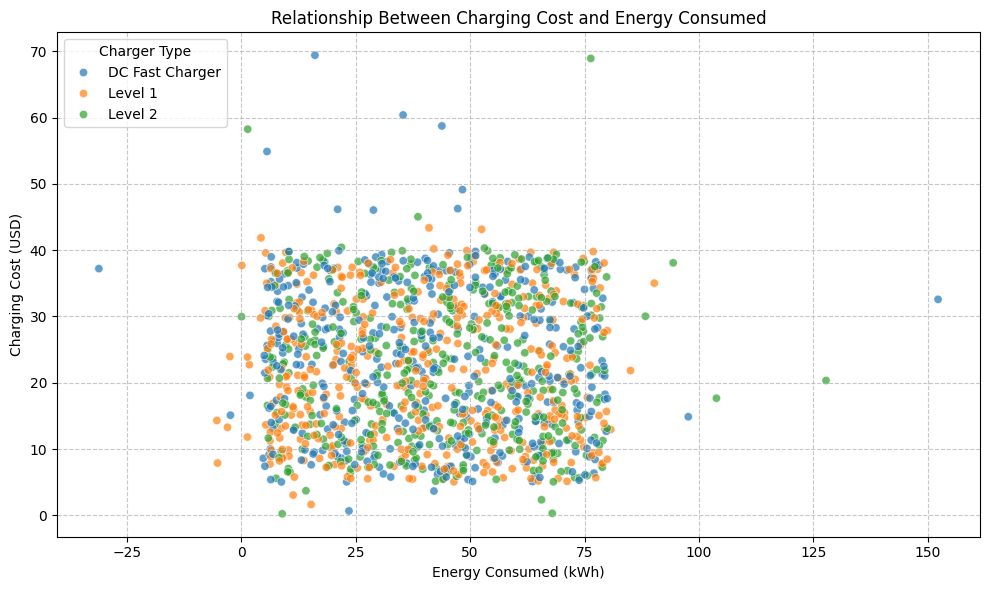

In [19]:
# 5. create scatter plot for relationship between Charging Cost and Energy Consumed
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data_ev['Energy Consumed (kWh)'],
    y=data_ev['Charging Cost (USD)'],
    hue=data_ev['Charger Type'],
    alpha=0.7
)
plt.title('Relationship Between Charging Cost and Energy Consumed')
plt.xlabel('Energy Consumed (kWh)')
plt.ylabel('Charging Cost (USD)')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Charger Type', loc='upper left')
plt.tight_layout()
plt.show()

**Insight:**
The scatter plot shows a positive correlation between energy consumed (kWh) and charging cost (USD) across all charger types. DC Fast Chargers generally appear in the higher consumption and cost ranges, reflecting their rapid charging capabilities.
>
**Explanation:**
This relationship underscores the cost implications of energy-intensive charging. It supports the need for optimized pricing models that balance affordability and revenue generation. Outliers may indicate operational inefficiencies or pricing inconsistencies that warrant further investigation.

----

### **Correlation Analysis** <a name='correlation'></a>

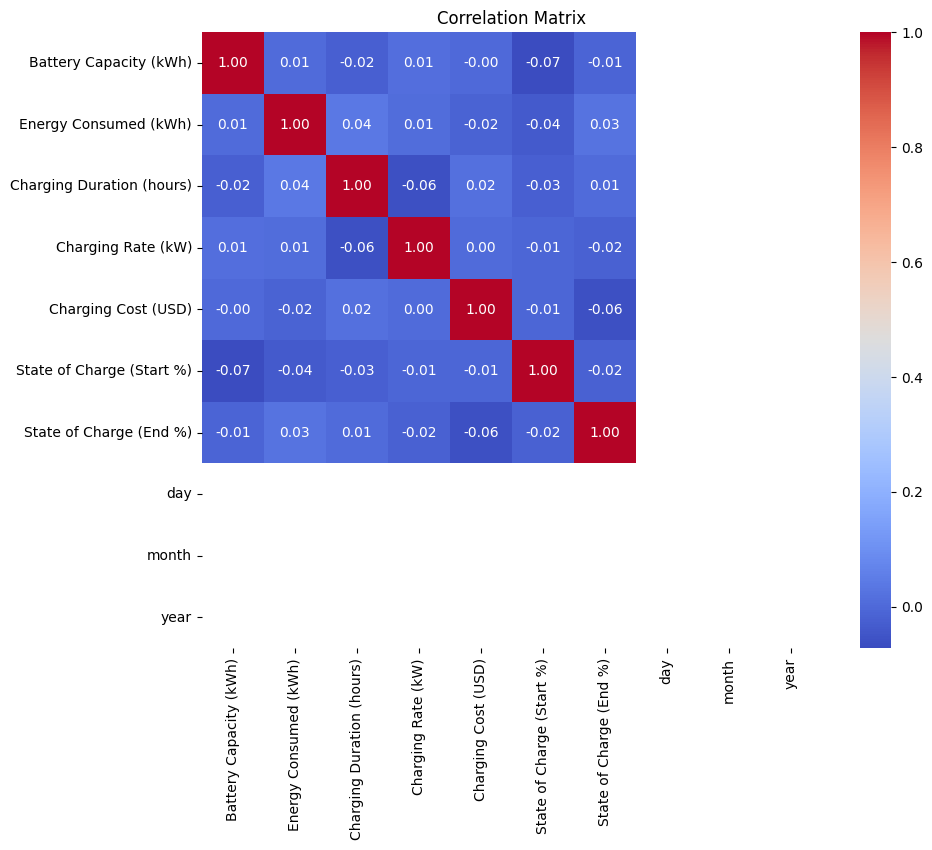

In [20]:
# 6. create correlation heatmap
plt.figure(figsize=(10, 8))
numerical_data = data_ev.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Insight:** The heatmap shows strong correlations between certain variables:
>
	- Charging cost (USD) and energy consumed (kWh) exhibit a strong positive correlation.
	- Charging duration shows a mild correlation with energy consumed which indicates longer sessions generally lead to higher consumption.
>
>
>
**Explanation:** These correlations help prioritize factors affecting operational planning such as energy supply aligns with peak demands and charging duration trends. These relationships can results targeted improvements in pricing, capacity, and user satisfaction.

---

# **4. Conclusion** <a name='summary'></a>


The analysis of EV charging patterns provided insights into user behavior, charging station utilization and operational trends. These findings guiding the optimization of charging infrastructure to meet the increasing demands of electric vehicle users. One key observation from the analysis is that most users prefer medium duration charging sessions typically lasting between 1 to 4 hours. This highlights the need for chargers capable of efficiently handling these durations. Additionally, locations catering to quick stops would benefit significantly from the deployment of more DC Fast Chargers that ensures rapid and convenient charging for users on the go.

The analysis of charger type usage revealed that all three types (Level 1, Level 2, and DC Fast Chargers) are almost evenly utilized. This emphasizes the importance of maintaining a balanced distribution of charger types to accommodate diverse user preferences whether they prioritize cost effectiveness or speed. Urban centers such as Los Angeles and New York emerged as hotspots for charging sessions which indicates a higher demand for charging infrastructure in these areas. Conversely, underutilized locations require further investigation to identify potential barriers such as accessibility, convenience, or inadequate awareness among users.

A positive correlation between energy consumption and charging cost was identified with DC Fast Chargers having higher costs due to their speed and efficiency. This correlation underscores the need for optimized pricing strategies that align with user value gives affordability while maintaining operational efficiency. Outliers in pricing patterns may point to inefficiencies or inconsistencies that should be addressed.

Overall, this analysis supports the development of a scalable, user-friendly and efficient EV charging ecosystem. Key recommendations include prioritizing high demand locations for infrastructure expansion, optimizing pricing models to balance affordability and revenue and reallocating resources to underutilized areas. Stakeholders can accelerate EV adoption which contribute to a sustainable and greener transportation future.

# **5. References** <a name='reference'></a>

* https://www.kaggle.com/datasets/valakhorasani/electric-vehicle-charging-patterns/data

* https://thecleverprogrammer.com/2024/03/18/electric-vehicles-market-size-analysis-using-python/

* https://www.mdpi.com/1996-1073/14/14/4349